In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

4.1

In [ ]:
df = pd.read_csv("ASHOKA.csv")

ashoka_mean_14=df[['Average Price']].rolling(14,min_periods=1).mean()
ashoka_std_14=df[['Average Price']].rolling(14,min_periods=1).std()

df['upper'] = ashoka_mean_14 + 2*ashoka_std_14
df['lower'] = ashoka_mean_14 - 2*ashoka_std_14
df['mid'] = ashoka_mean_14
df = df[1:]

In [ ]:
def call(row):
    if row['Close Price'] <= row['lower']: return 'Buy'
    elif row['Close Price'] >= row['upper']: return 'Short'
    elif row['Close Price'] <  row['mid']:   return 'Hold Buy/Liquidate Short'
    elif row['Close Price'] >  row['mid']:   return 'Hold Short/Liquidate Buy'

df['call'] = df.apply(call, axis=1)

In [ ]:
n = len(df)
dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1,max_iter=600)
clf.fit(dft[['Close Price','lower','upper','mid']], dft['call'])

accuracy_score(dfte['call'], clf.predict(dfte[['Close Price','lower','upper','mid']]))

1.0

In [ ]:
df2 = pd.read_csv("BAJAJELEC.csv")

bajaj_mean_14=df2[['Average Price']].rolling(14,min_periods=1).mean()
bajaj_std_14=df2[['Average Price']].rolling(14,min_periods=1).std()

df2['upper'] = bajaj_mean_14 + 2*bajaj_std_14
df2['lower'] = bajaj_mean_14 - 2*bajaj_std_14
df2['mid'] = bajaj_mean_14
df2 = df2[1:]

df2['call'] = df2.apply(call, axis=1)

accuracy_score(df2['call'], clf.predict(df2[['Close Price','lower','upper','mid']]))

0.9918864097363083

4.2

In [ ]:
df = pd.read_csv("ASHOKA.csv")
df['oc'] = 100*(df['Close Price']-df['Open Price'])/df['Open Price']
df['lh'] = 100*(df['High Price']-df['Low Price'])/df['Low Price']
df['mean5']=df[['Close Price']].rolling(5,min_periods=1).mean()
df['std5']=df[['Close Price']].rolling(5,min_periods=1).std()
df = df[1:]
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc,lh,mean5,std5
1,ASHOKA,EQ,16-May-2017,216.05,212.3,216.00,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26,1.224682,2.369668,215.475000,0.813173
2,ASHOKA,EQ,17-May-2017,214.90,214.3,218.70,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37,1.259916,3.111740,215.983333,1.051586
3,ASHOKA,EQ,18-May-2017,217.00,216.0,216.60,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05,-2.939815,4.134615,214.400000,3.281006
4,ASHOKA,EQ,19-May-2017,209.65,212.1,213.90,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68,-2.758133,4.316020,212.770000,4.621499
5,ASHOKA,EQ,22-May-2017,206.25,208.5,209.15,198.95,201.05,201.60,204.11,126516,25822846.35,2941,86762,68.58,-3.309353,5.126916,209.880000,6.278595


In [ ]:
def action(row):
    if row['Close Price'] <= row['Prev Close']: return 1
    else: return -1

df['action'] = df.apply(action, axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n = len(df)
dft = df[:int(n*0.8)]
dfte = df[int(n*0.8):]

clf2 = RandomForestClassifier(random_state=0)
clf2.fit(dft[['oc','lh','mean5','std5']], dft['action'])

accuracy_score(dfte['action'], clf2.predict(dfte[['oc','lh','mean5','std5']]))

0.8585858585858586

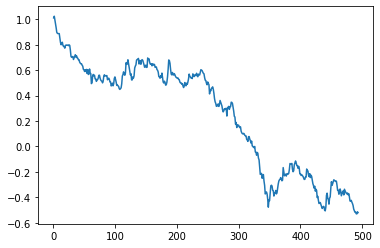

In [ ]:
plt.plot(1+(df['oc']/100).cumsum())